In [70]:
import matplotlib.pyplot as plt
import json
import numpy as np

In [63]:
def compare_results(a, b, label_a = "a", label_b = "b"):
    assert len(a) == len(b)
    
    sorted_a = list(sorted([-q for q in a], reverse=True))
    sorted_b = list(sorted([-q for q in b], reverse=True))
    
    xs = list(range(1, len(a) + 1))
    
    
    plt.bar(xs, sorted_a, alpha=0.5, color="red", width = 1.0, label=label_a)
    plt.bar(xs, sorted_b, alpha=0.5, color="blue", width = 1.0, label=label_b)
    plt.legend(loc="upper right")
    plt.title(f"Pivots Required on Test Set for {label_a} vs {label_b}")
    plt.xlabel("Test Set Index, Sorted Worst to Best")
    plt.ylabel("Number of Pivots")
    plt.show()

In [64]:
def load(fname):
    with open(fname, "r") as file:
        return json.load(file)

In [65]:
rand = load("../inference/4_euclid_random.json")

In [66]:
dantz = load("../inference/4_euclid_dantzig.json")

In [67]:
steep = load("../inference/4_euclid_steepest_edge.json")

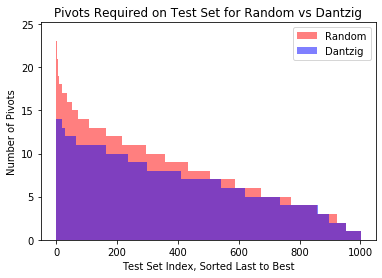

In [68]:
compare_results(rand, dantz, label_a = "Random", label_b = "Dantzig")

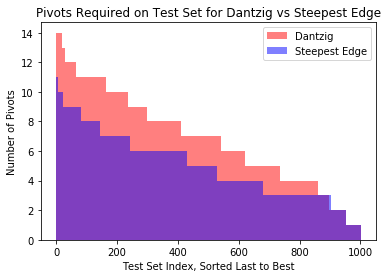

In [69]:
compare_results(dantz, steep, label_a = "Dantzig", label_b = "Steepest Edge")

In [71]:
randa = np.array(rand)
dantza = np.array(dantz)
steepa = np.array(steep)

In [72]:
sum(randa <= dantz)

782